In [1]:
from pgn2gif import chess
import numpy as np
from openTSNE import TSNE
from openTSNE.callbacks import ErrorApproximations
from matplotlib import pyplot as plt
from scipy import interpolate
import re

FILE_NAME = '../alphazero_vs_stockfish_all.pgn'

In [2]:
def state_to_vector(state):
    piece_dict = {
        'wr': [1,0,0,0,0,0,0,0,0,0,0,0,0],
        'wn': [0,1,0,0,0,0,0,0,0,0,0,0,0],
        'wb': [0,0,1,0,0,0,0,0,0,0,0,0,0],
        'wk': [0,0,0,1,0,0,0,0,0,0,0,0,0],
        'wq': [0,0,0,0,1,0,0,0,0,0,0,0,0],
        'wp': [0,0,0,0,0,1,0,0,0,0,0,0,0],
        'br': [0,0,0,0,0,0,1,0,0,0,0,0,0],
        'bn': [0,0,0,0,0,0,0,1,0,0,0,0,0],
        'bb': [0,0,0,0,0,0,0,0,1,0,0,0,0],
        'bk': [0,0,0,0,0,0,0,0,0,1,0,0,0],
        'bq': [0,0,0,0,0,0,0,0,0,0,1,0,0],
        'bp': [0,0,0,0,0,0,0,0,0,0,0,1,0],
        '':   [0,0,0,0,0,0,0,0,0,0,0,0,1],
    }    
    state_list = list(state.values())    
    vector = []
    for piece in state_list:
        vector.append(piece_dict[piece])
    return np.array(vector).ravel()

def vector_to_state(vector):
    vec_dict = {
        '1000000000000': "wr",
        '0100000000000': "wn",
        '0010000000000': "wb",
        '0001000000000': "wk",
        '0000100000000': "wq",
        '0000010000000': "wp",
        '0000001000000': "br",
        '0000000100000': "bn",
        '0000000010000': "bb",
        '0000000001000': "bk",
        '0000000000100': "bq",
        '0000000000010': "bp",
        '0000000000001': ""
    }
    
    return vec_dict[vector]

In [3]:
# def game_to_vectors(file):
#     moves = chess.get_moves_from_pgn(file)
#     game = chess.ChessGame()
#     vectors = [state_to_vector(game.state)]
#     for move in moves:
#         game.push(move)
#         vectors.append(state_to_vector(game.state))
#     return np.stack(vectors)

In [4]:
def game_to_vectors(file):
    game = chess.ChessGame(file)
    vectors = [state_to_vector(game.state)]
    while not game.is_finished:
        try:
            game.next()
        except:
            pass
        vectors.append(state_to_vector(game.state))
    return np.stack(vectors)

In [5]:
def get_moves_from_pgn(pgn):
    with open(pgn) as p:
        data = p.read()
        data = re.sub(r'\{.*?\}', '', data)  # Removes pgn comments
        moves = re.findall(
            r'[a-h]x?[a-h]?[1-8]=?[BKNRQ]?|O-O-?O?|[BKNRQ][a-h1-8]?[a-h1-8]?x?[a-h][1-8]',
            data)
        return [move.replace('x', '') for move in moves]

In [6]:
print("start loading")

start loading


In [7]:
np.random.seed(0)
randgames = ['games/game-{:05d}.pgn'.format(n) for n in np.unique(np.random.randint(40000,size=50))]

In [8]:
from pathlib import Path
Path("games").mkdir(parents=True, exist_ok=True)

with open(FILE_NAME, 'r') as f:
    all_games = f.read()

span = 2
all_games = all_games.split("\n\n")
split_games  = ["\n\n".join(all_games[i:i+span]) for i in range(0, len(all_games), span)]


for i in range(len(split_games)):
    with open('games/game-{:05d}.pgn'.format(i+1),'w') as f:
        f.write(split_games[i])

In [9]:
notrandgames = ['games/game-{:05d}.pgn'.format(n+1) for n in range(10000)]

In [10]:
# notrandgames = [FILE_NAME]

In [11]:
game_to_vectors(notrandgames[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [12]:
notrandgames_checked = []
for id, g in enumerate(notrandgames):
    try:
        game_to_vectors(g)
    except:
        pass
    else:
        notrandgames_checked.append((id,g))

In [13]:
notrandgames_checked

[(0, 'games/game-00001.pgn'),
 (1, 'games/game-00002.pgn'),
 (2, 'games/game-00003.pgn'),
 (3, 'games/game-00004.pgn'),
 (4, 'games/game-00005.pgn'),
 (5, 'games/game-00006.pgn'),
 (6, 'games/game-00007.pgn'),
 (7, 'games/game-00008.pgn'),
 (8, 'games/game-00009.pgn'),
 (9, 'games/game-00010.pgn'),
 (10, 'games/game-00011.pgn'),
 (11, 'games/game-00012.pgn'),
 (12, 'games/game-00013.pgn'),
 (13, 'games/game-00014.pgn'),
 (14, 'games/game-00015.pgn'),
 (15, 'games/game-00016.pgn'),
 (16, 'games/game-00017.pgn'),
 (17, 'games/game-00018.pgn'),
 (18, 'games/game-00019.pgn'),
 (19, 'games/game-00020.pgn'),
 (20, 'games/game-00021.pgn'),
 (21, 'games/game-00022.pgn'),
 (22, 'games/game-00023.pgn'),
 (23, 'games/game-00024.pgn'),
 (24, 'games/game-00025.pgn'),
 (25, 'games/game-00026.pgn'),
 (26, 'games/game-00027.pgn'),
 (27, 'games/game-00028.pgn'),
 (28, 'games/game-00029.pgn'),
 (29, 'games/game-00030.pgn'),
 (30, 'games/game-00031.pgn'),
 (31, 'games/game-00032.pgn'),
 (32, 'games/game-

In [14]:
get_moves_from_pgn(FILE_NAME)

['Nf3',
 'Nf6',
 'c4',
 'e6',
 'Nc3',
 'Bb4',
 'Qc2',
 'O-O',
 'a3',
 'Bc3',
 'Qc3',
 'a5',
 'b4',
 'd6',
 'e3',
 'Ne4',
 'Qc2',
 'Ng5',
 'b5',
 'Nf3',
 'gf3',
 'Qf6',
 'd4',
 'Qf3',
 'Rg1',
 'Nd7',
 'Be2',
 'Qf6',
 'Bb2',
 'Qh4',
 'Rg4',
 'Qh2',
 'Rg3',
 'f5',
 'O-O-O',
 'Rf7',
 'Bf3',
 'Qh4',
 'Rh1',
 'Qf6',
 'Kb1',
 'g6',
 'Rgg1',
 'a4',
 'Ka1',
 'Rg7',
 'e4',
 'f4',
 'c5',
 'Qe7',
 'Rc1',
 'Nf6',
 'e5',
 'de5',
 'Rhe1',
 'e4',
 'Be4',
 'Qf8',
 'd5',
 'ed5',
 'Bd3',
 'Bg4',
 'f3',
 'Bd7',
 'Qc3',
 'Nh5',
 'Re5',
 'c6',
 'Rce1',
 'Nf6',
 'Qd4',
 'cb5',
 'Bb1',
 'Bc6',
 'Re6',
 'Rf7',
 'Rg1',
 'Qg7',
 'Qf4',
 'Re8',
 'Rd6',
 'Nd7',
 'Qc1',
 'Rf6',
 'f4',
 'Qe7',
 'Rf6',
 'Nf6',
 'f5',
 'Qe3',
 'fg6',
 'Qc1',
 'gh7',
 'Kf7',
 'Rc1',
 'Nh7',
 'Bh7',
 'Re3',
 'Rd1',
 'Ke8',
 'Ka2',
 'Bd7',
 'Bd4',
 'Rh3',
 'Bc2',
 'Be6',
 'Re1',
 'Kd7',
 'Kb2',
 'Rf3',
 'Re5',
 'Rg3',
 'Re3',
 'Rg2',
 'Kc3',
 'Rg4',
 'Rf3',
 'Ke8',
 'Rf2',
 'Rg3',
 'Kb4',
 'Rg4',
 'Rd2',
 'Bd7',
 'Ka5',
 'Rf4',
 'Be5',
 

In [15]:
firstmoves = [(g[0],get_moves_from_pgn(g[1])[0]) for g in notrandgames_checked]

In [16]:
nf3_indices = []
for idx, fm in firstmoves:
    if fm == 'Nf3':
        nf3_indices.append(idx)

In [17]:
d4_indices = []
for idx, fm in firstmoves:
    if fm == 'd4':
        d4_indices.append(idx)

In [18]:
c4_indices = []
for idx, fm in firstmoves:
    if fm == 'c4':
        c4_indices.append(idx)

In [19]:
e4_indices = []
for idx, fm in firstmoves:
    if fm == 'e4':
        e4_indices.append(idx)

In [20]:
nf3_games = ['games/game-{:05d}.pgn'.format(n+1) for n in np.array(nf3_indices)[:150]]
d4_games = ['games/game-{:05d}.pgn'.format(n+1) for n in np.array(d4_indices)[:150]]
c4_games = ['games/game-{:05d}.pgn'.format(n+1) for n in np.array(c4_indices)[:150]]
e4_games = ['games/game-{:05d}.pgn'.format(n+1) for n in np.array(e4_indices)[:150]]

In [21]:
print(len(nf3_games))
print(len(d4_games))
print(len(c4_games))
print(len(e4_games))

24
60
0
26


In [22]:
both_games = np.concatenate([nf3_games, d4_games, c4_games, e4_games])

In [23]:
game_matrices = [game_to_vectors(g) for g in both_games]


### handling an error where the last 2 states of each game are equivalent - remove redundant one

In [24]:
# game matrices is num_games * num_turns * 832 
for game in range(len(game_matrices)):
    # check for each game whether last 2 game states are equivalent
    if np.all(game_matrices[game][-2] == game_matrices[game][-1]):
        # if so, remove the last state
        game_matrices[game] = game_matrices[game][:-1]

### removing last state after checkmate
there is no move left to be done, therefore lc0 or any chess network wouldn't predict on it - the lc0 dataset does not contain this state

In [25]:
# game matrices is num_games * num_turns * 832 
for game in range(len(game_matrices)):
    game_matrices[game] = game_matrices[game][:-1]

In [26]:
final_data = np.concatenate(game_matrices)

In [27]:
tsne = TSNE(
    perplexity=200,
    n_jobs=6,
    metric='euclidean',
    random_state=42
)

In [28]:
%time embedding = tsne.fit(np.array(final_data))

CPU times: user 24min 14s, sys: 32 s, total: 24min 46s
Wall time: 16min


In [29]:
embedding_split = np.array_split(embedding, np.add.accumulate([len(l) for l in game_matrices]))[:-1]

In [30]:
# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111)
# ax.set_aspect(1)
# for game in embedding_split[:10]:
#     tck, u = interpolate.splprep(game.transpose(), s=0)
#     unew = np.arange(0, 1.01, 0.01)
#     out = interpolate.splev(unew, tck)
#     ax.plot(out[0], out[1], '-r', alpha=0.03, color='red')
#     ax.scatter(game[:,0], game[:,1], s=0.1, color='red')
# #for game in embedding_split[10:800]:
# #    tck, u = interpolate.splprep(game.transpose(), s=0)
# #    unew = np.arange(0, 1.01, 0.01)
# #    out = interpolate.splev(unew, tck)
# #    ax.plot(out[0], out[1], '-r', alpha=0.03, color='blue')
# #    ax.scatter(game[:,0], game[:,1], s=0.1, color='blue')
# plt.xlim((-40,50));
# plt.ylim((-60,40));
# #for game in embedding_split[100:]:
# #    ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='blue')


# write header
csv = open("test.csv", "w")
csv.write("x,y,line,cp,algo,age,a8,b8,c8,d8,e8,f8,g8,h8,a7,b7,c7,d7,e7,f7,g7,h7,a6,b6,c6,d6,e6,f6,g6,h6,a5,b5,c5,d5,e5,f5,g5,h5,a4,b4,c4,d4,e4,f4,g4,h4,a3,b3,c3,d3,e3,f3,g3,h3,a2,b2,c2,d2,e2,f2,g2,h2,a1,b1,c1,d1,e1,f1,g1,h1")
csv.write("\n")
idx = 0

for gameIndex, game in enumerate(embedding_split[:450]):
    pi = 0
    for idx, pos in enumerate(game):
        csv.write(str(pos[0]))
        csv.write(",")
        csv.write(str(pos[1]))
        
        # number of game
        csv.write(",")
        csv.write(str(gameIndex))
        
        # checkpoint
        csv.write(",")
        if idx == 0:
            csv.write("1")
        elif idx == len(game) - 1:
            csv.write("1")
        else:
            csv.write("0")
        
        
        
        # method, in this case the starting move
        csv.write(",")
        # TODO replace with which player is making the move
        csv.write("0")
#         if 0 <= gameIndex <= 150:
#             csv.write("0")
#         elif 100 < gameIndex <= 300:
#             csv.write("1")
#         else:
#             csv.write("2")
        
        # age
        csv.write(",")
        csv.write(str(idx))
        
        for n in range(0, 64):
            csv.write(",")
            str1 = ''.join(str(e) for e in game_matrices[gameIndex][idx][n * 13: (n+1) * 13])
            csv.write(vector_to_state(str1))
            
        csv.write("\n")
    gameIndex += 1
        
csv.close()

In [31]:
import umap.umap_ as umap

In [32]:
reducer = umap.UMAP()

In [33]:
umap_embedding = reducer.fit_transform(final_data)

In [34]:
umap_embedding_split = np.array_split(umap_embedding, np.add.accumulate([len(l) for l in game_matrices]))[:-1]

<ipython-input-35-63316b69935b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='red')
<ipython-input-35-63316b69935b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='red')
<ipython-input-35-63316b69935b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='red')
<ipython-input-35-63316b69935b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(game[:,0], game[:,1], '-r', alpha=0.

<ipython-input-35-63316b69935b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='red')
<ipython-input-35-63316b69935b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='red')
<ipython-input-35-63316b69935b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='red')
<ipython-input-35-63316b69935b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(game[:,0], game[:,1], '-r', alpha=0.

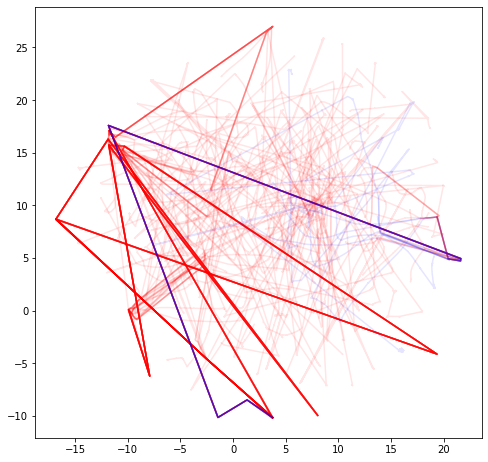

In [35]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_aspect(1)
for game in umap_embedding_split[:100]:
    ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='red')
for game in umap_embedding_split[100:]:
    ax.plot(game[:,0], game[:,1], '-r', alpha=0.1, color='blue')